In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

#stud = pd.read_csv('stud_math.csv')
stud = pd.read_csv('stud_math.xls')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Для удобства использования pandas переименуем все столбцы:

In [3]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

In [4]:
display(stud.sample(10))
stud.info()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
326,GP,M,17,U,GT3,T,3.0,3.0,other,services,reputation,mother,1.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,3.0,5.0,5.0,3.0,80.0
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0
339,GP,F,17,R,GT3,A,3.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,2.0,4.0,50.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,NaN,course,mother,NaN,1.0,2.0,no,no,no,NaN,yes,-3.0,no,yes,yes,NaN,3.0,2.0,5.0,0.0,0.0
173,GP,F,16,U,GT3,T,1.0,3.0,at_home,services,home,NaN,1.0,2.0,3.0,no,no,no,yes,no,-6.0,yes,yes,yes,4.0,3.0,5.0,3.0,0.0,0.0
380,MS,M,18,U,GT3,T,4.0,4.0,teacher,teacher,home,father,1.0,2.0,0.0,no,no,yes,yes,no,-6.0,yes,yes,NaN,3.0,2.0,4.0,2.0,4.0,70.0
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
303,GP,F,17,U,GT3,T,3.0,2.0,health,NaN,reputation,father,1.0,4.0,0.0,no,yes,yes,yes,no,-12.0,yes,yes,no,5.0,2.0,2.0,5.0,0.0,90.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [5]:
stud.describe()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Датасет содержит 394 строк (учеников), 30 признаков (в т.ч. целевой признак score - оценка по математике), из них 13 признаков числовых и 17 строковых.

## Функции, использованные для предобработки датасета.

In [6]:
def describe_column(data, column):
    '''принимает на вход датасет и выбранный признак
    для признака выводит тип значений, количество пустых строк,
    количество строк каждой категории.
    Для числовых признаков дополнительно выводится распределение и
    рисуется гистограмма
    '''
    column_type_numeric = False
    
    # печатаем тип колонки
    if data[column].dtype == "O":
        print('Признак', column, 'имеет категориальные значения.')
    elif data[column].dtype == "int64" or data[column].dtype == "float64":
        column_type_numeric = True        
        print('Признак', column, 'имеет числовые значения.')
    else:
        print('Признак', column, 'имеет тип', data[column].dtype)
    
    print()
    
    # печатаем количество пустых строк
    print('Количество пустых строк:', data[column].isna().sum())
    
    print()
    
    # печатаем значения признака
    print('Значения признака:')
    print(data[column].value_counts())
    
    print()
    
    # для числовых признаков печатаем распределение
    if column_type_numeric:
        print('Распределение значений признака:')
        print(data[column].describe())
        
        print()
        
    # для числовых признаков рисуем гистограмму
        data[column].hist()


def get_Scatter_Plot(data, column, score_column):
    '''функция принимает на вход датафрейм, два признак для сравнения
    рисует scatterplot соответствия признаков, а 
    также график полинома первой степени взаимосвязи между признаками;
    выводит значение корреляции, также p-value для теста гипотезы, 
    нулевой гипотезой которого является то, что наклон равен нулю 
    '''
    fig, ax = plt.subplots()
    # строим scatterplot
    ax.scatter(data[column], data[score_column])
    
    # строим полином зависимости score от признака column
    m, y = np.polyfit(data[column], data[score_column], 1)
    plt.plot(data[column], m * data[column] + y, '-',color="magenta")
    plt.title('{} vs {} '.format(score_column, column))
    plt.xlabel(column)
    plt.ylabel(score_column)
    plt.show()
    
    # выводим коэффициент корреляции между score и признаком column
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[column], data[score_column])
    print('r - коэффициент корреляции между {} and {}: {}'.format(column, score_column, r_value))
    print()
    
    # выводим коэффициент корреляции между score и признаком column
    print('Уровень значимости нулевой гипотезы о независимости признаков: {}'.format(p_value))
    
    
def get_stat_dif(data, column, score_column):
    ''' функция принимает на вход датафрейм, два признак для сравнения.
    функция проверяет, есть ли статистическая разница в распределении оценок
    по номинативным признакам, с помощью теста Стьюдента.
    Нулевая гипотеза - распределения признаков неразличимы
    '''
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        p_value = ttest_ind(data.loc[data.loc[:, column] == comb[0], score_column], 
                        data.loc[data.loc[:, column] == comb[1], score_column]).pvalue
        if p_value <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Внимание! Найдены статистически значимые различия для признаков {} и {}'\
                 .format(column, score_column))
            break
    else:
        print('Статистические различия для признаков {} и {} не найдены '\
                 .format(column, score_column))
        
def get_boxplot(data, column, score_column):
    '''функция принимает на вход датафрейм, два признака.
    рисует boxplot распределения признака column
    '''
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y=score_column, 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Теперь рассмотрим все столбцы по отдельности. 

## school

Посмотрим, сколько школ содержит наш датасет.

In [7]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


Итого у нас 2 уникальных значения. Большая часть учеников учится в школе с аббревиатурой GP,  остальные в MS. Этот столбец строковый и без пропусков.

## sex

Сделаем то же самое для столбца с полом учеников.

In [8]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


Итого у нас 2 уникальных значения. Большая часть учеников в датасете девушки. Этот столбец строковый и без пропусков.

## age

In [9]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

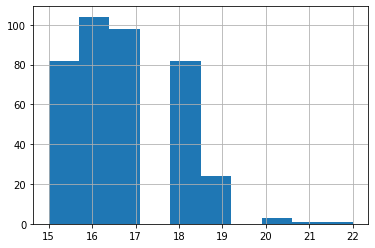

In [10]:
stud.age.hist()
stud.age.describe()

В результате отмечаем, что в данной выборке содержатся данные по возрастам 15-22 года, основная масса учащихся в возрасте до 19 лет и всего 5 учащихся старше 19 лет.

## address

In [11]:
# смотрим на значения
describe_column(stud, 'address')

Признак address имеет категориальные значения.

Количество пустых строк: 17

Значения признака:
U    295
R     83
Name: address, dtype: int64



In [12]:
# сколько пустых значений
print('Учеников без указания адреса - {:.2%}'
      .format(len(stud[stud.address.isna()].index)/len(stud.index)))

Учеников без указания адреса - 4.30%


Большая часть учеников живет в городе (значение U). В столбце address 17 пустых значений (4.30% всего датасета). Пустые строки заполним новым значением unknown.

In [13]:
# заполняем пустые строки новым значением
stud.address = stud.address.fillna('unknown')

# проверяем количество пустых строк
stud.address.isna().sum()

0

## famsize

In [14]:
# смотрим на значения
describe_column(stud, 'famsize')

Признак famsize имеет категориальные значения.

Количество пустых строк: 27

Значения признака:
GT3    261
LE3    107
Name: famsize, dtype: int64



Большая часть учеников живет в семьях с количеством членов более 3 (значение GT3). В столбце famsize 27 пустых значений.

In [15]:
# Пустые строки заполним самым популярным значением - GT3, значения LE3 меняем на 1, значения GT3 меняем на 2.
stud.famsize = stud.famsize.apply(lambda s: 1 if s == 'LE3' else 2)

In [16]:
# проверяем полученные значения
stud.famsize.value_counts()

2    288
1    107
Name: famsize, dtype: int64

## pstatus

In [17]:
# смотрим на значения
describe_column(stud, 'pstatus')

Признак pstatus имеет категориальные значения.

Количество пустых строк: 45

Значения признака:
T    314
A     36
Name: pstatus, dtype: int64



In [18]:
# сколько пустых значений
print('Учеников без указания адреса - {:.2%}'
      .format(len(stud[stud.pstatus.isna()].index)/len(stud.index)))

Учеников без указания адреса - 11.39%


В колонке pstatus 45 пустых строк. Большая часть родителей живут вместе. Пустые строки заполним самым популярным значением(T).

In [19]:
stud.pstatus = stud.pstatus.fillna('T')

# проверяем количество пустых строк
stud.pstatus.isna().sum()

0

## medu

Признак medu имеет числовые значения.

Количество пустых строк: 3

Значения признака:
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64

Распределение значений признака:
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64



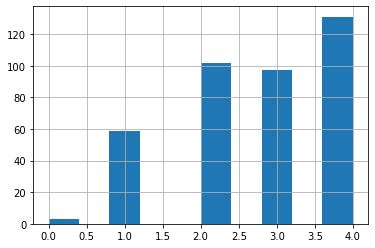

In [20]:
# смотрим на значения
describe_column(stud, 'medu')

В столбце medu есть 3 пустых записи. Заполним их медианой.

In [21]:
# заполняем пустые строки новым значением
stud.medu = stud.medu.fillna(stud.medu.median())

# проверяем количество пустых строк
stud.medu.isna().sum()

0

## fedu

Признак fedu имеет числовые значения.

Количество пустых строк: 24

Значения признака:
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

Распределение значений признака:
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64



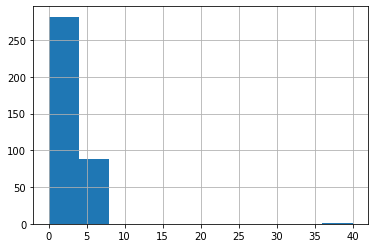

In [22]:
# смотрим на значения
describe_column(stud, 'fedu')

В колонке Fedu есть 24 пустых записи. Заполним их медианой 2.0.
Есть ошибка заполнения (начение 40.0). Заменим некорректное значение на 4.0.

In [23]:
# исправляем ошибку ввода
stud.loc[stud.fedu == 40.0, 'fedu'] = 4.0

In [24]:
# заполняем пустые строки новым значением
stud.fedu = stud.fedu.fillna(stud.fedu.median())

Признак fedu имеет числовые значения.

Количество пустых строк: 0

Значения признака:
2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

Распределение значений признака:
count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64



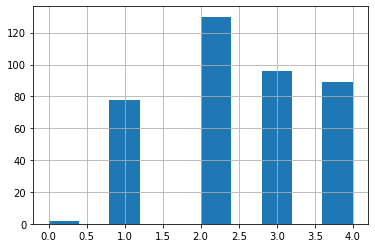

In [25]:
# проверяем все исправления
describe_column(stud, 'fedu')

## mjob

In [26]:
# смотрим на значения
describe_column(stud, 'mjob')

Признак mjob имеет категориальные значения.

Количество пустых строк: 19

Значения признака:
other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64



Признак mjob категориальный. Есть 19 пустых строк, принимает 5 уникальных значений. Пустые строки заполним самым популярным значением(other).

In [27]:
# заполняем пустые строки новым значением
stud.mjob = stud.mjob.fillna('other')

In [28]:
# проверяем все исправления
describe_column(stud, 'mjob')

Признак mjob имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
other       152
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64



## fjob

In [29]:
# смотрим на значения
describe_column(stud, 'fjob')

Признак fjob имеет категориальные значения.

Количество пустых строк: 36

Значения признака:
other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64



Признак mjob категориальный. Есть 36 пустых строк, принимает 5 уникальных значений. Пустые строки заполним самым популярным значением(other).

In [30]:
# заполняем пустые строки новым значением
stud.fjob = stud.fjob.fillna('other')

In [31]:
# проверяем все исправления
describe_column(stud, 'fjob')

Признак fjob имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
other       233
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64



## reason

In [32]:
# смотрим на значения
describe_column(stud, 'reason')

Признак reason имеет категориальные значения.

Количество пустых строк: 17

Значения признака:
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64



Признак reason категориальный. Есть 17 пустых строк, принимает 4 уникальных значения. Пустые строки заполним самым популярным значением(course).

In [33]:
# заполняем пустые строки новым значением
stud.reason = stud.reason.fillna('course')

In [34]:
# проверяем все исправления
describe_column(stud, 'reason')

Признак reason имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64



## guardian

In [35]:
# смотрим на значения
describe_column(stud, 'guardian')

Признак guardian имеет категориальные значения.

Количество пустых строк: 31

Значения признака:
mother    250
father     86
other      28
Name: guardian, dtype: int64



Признак guardian категориальный. Есть 31 пустая строка, принимает 3 уникальных значения. Пустые строки заполним самым популярным значением(mother).

In [36]:
# заполняем пустые строки новым значением
stud.guardian = stud.guardian.fillna('mother')

In [37]:
# проверяем все исправления
describe_column(stud, 'guardian')

Признак guardian имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
mother    281
father     86
other      28
Name: guardian, dtype: int64



## traveltime

Признак traveltime имеет числовые значения.

Количество пустых строк: 28

Значения признака:
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Распределение значений признака:
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64



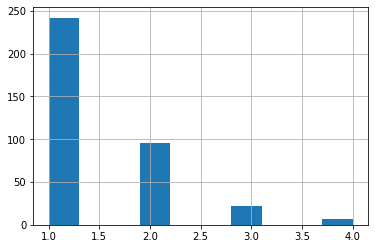

In [38]:
# смотрим на значения
describe_column(stud, 'traveltime')

В столбце traveltime есть 28 пустых записей. Заполним их медианой 1.0. Выбросов нет.

In [39]:
# заполняем пустые строки новым значением
stud.traveltime = stud.traveltime.fillna(stud.traveltime.median())

In [40]:
# проверяем наличие пустых строк
stud.traveltime.isna().sum()

0

## studytime

Признак studytime имеет числовые значения.

Количество пустых строк: 7

Значения признака:
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Распределение значений признака:
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64



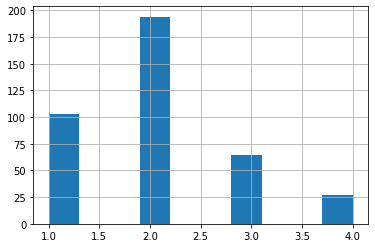

In [41]:
# смотрим на значения
describe_column(stud, 'studytime')

Признак studytime числовой, но на самом деле он категориальный. Есть 7 пустых строк, принимает 4 уникальных значения. Выбросов нет. Пустые строки заполним медианой (2.0).

In [42]:
# заполняем пустые строки новым значением
stud.studytime = stud.studytime.fillna(stud.studytime.median())

In [43]:
# проверяем наличие пустых строк
stud.studytime.isna().sum()

0

## failures

Признак failures имеет числовые значения.

Количество пустых строк: 22

Значения признака:
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Распределение значений признака:
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64



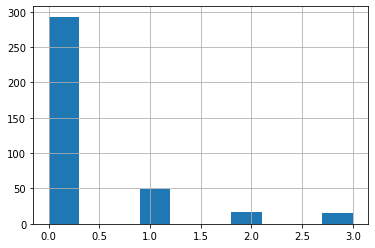

In [44]:
# смотрим на значения
describe_column(stud, 'failures')

Признак failures числовой, но на самом деле он категориальный. Есть 22 пустых строки, принимает 4 уникальных значения. Выбросов нет. Пустые строки заполним медианой (0.0).

In [45]:
# заполняем пустые строки новым значением
stud.failures = stud.failures.fillna(stud.failures.median())

In [46]:
# проверяем наличие пустых строк
stud.failures.isna().sum()

0

## schoolsup

In [47]:
# смотрим на значения
describe_column(stud, 'schoolsup')

Признак schoolsup имеет категориальные значения.

Количество пустых строк: 9

Значения признака:
no     335
yes     51
Name: schoolsup, dtype: int64



Признак schoolsup категориальный. Есть 9 пустых строк, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением('no').

In [48]:
# заполняем пустые строки новым значением
stud.schoolsup = stud.schoolsup.fillna('no')

In [49]:
# смотрим на значения
describe_column(stud, 'schoolsup')

Признак schoolsup имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
no     344
yes     51
Name: schoolsup, dtype: int64



## famsup

In [50]:
# смотрим на значения
describe_column(stud, 'famsup')

Признак famsup имеет категориальные значения.

Количество пустых строк: 39

Значения признака:
yes    219
no     137
Name: famsup, dtype: int64



In [51]:
# сколько пустых значений
print('Учеников без указания семейной образовательной поддержки - {:.2%}'
      .format(len(stud[stud.famsup.isna()].index)/len(stud.index)))

Учеников без указания семейной образовательной поддержки - 9.87%


Признак famsup категориальный. Есть 39 пустых строк, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением(yes).

In [52]:
# заполняем пустые строки новым значением
stud.famsup = stud.famsup.fillna('yes')

In [53]:
# смотрим на значения
describe_column(stud, 'famsup')

Признак famsup имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes    258
no     137
Name: famsup, dtype: int64



## paid

In [54]:
# смотрим на значения
describe_column(stud, 'paid')

Признак paid имеет категориальные значения.

Количество пустых строк: 40

Значения признака:
no     200
yes    155
Name: paid, dtype: int64



Признак paid категориальный. Есть 40 пустых строк, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением('no').

In [55]:
# заполняем пустые строки новым значением
stud.paid = stud.paid.fillna('no')

In [56]:
# смотрим на значения
describe_column(stud, 'paid')

Признак paid имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
no     240
yes    155
Name: paid, dtype: int64



## activities

In [57]:
# смотрим на значения
describe_column(stud, 'activities')

Признак activities имеет категориальные значения.

Количество пустых строк: 14

Значения признака:
yes    195
no     186
Name: activities, dtype: int64



Признак activities категориальный. Есть 14 пустых строк, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением(yes).

In [58]:
# заполняем пустые строки новым значением
stud.activities = stud.activities.fillna('yes')

In [59]:
# смотрим на значения
describe_column(stud, 'activities')

Признак activities имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes    209
no     186
Name: activities, dtype: int64



## nursery

In [60]:
# смотрим на значения
describe_column(stud, 'nursery')

Признак nursery имеет категориальные значения.

Количество пустых строк: 16

Значения признака:
yes    300
no      79
Name: nursery, dtype: int64



Признак nursery категориальный. Есть 16 пустых строк, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением(yes).

In [61]:
# заполняем пустые строки новым значением
stud.nursery = stud.nursery.fillna('yes')

In [62]:
# смотрим на значения
describe_column(stud, 'nursery')

Признак nursery имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes    316
no      79
Name: nursery, dtype: int64



## granular

Сразу заменим пропуски на None:

In [63]:
stud.granular = stud.granular.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [64]:
display(pd.DataFrame(stud.granular.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud.granular.value_counts() > 10).sum())
print("Уникальных значений:", stud.granular.nunique())
stud.loc[:, ['granular']].info()

,granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27
nan,7


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   granular  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Итого у нас 4 уникальных значения и 7 строк, в которых значения неизвестны.

Признак получен из признака studytime умножением на -3. Вряд ли он пригодится для дальнейшего анализа, удалим его.

In [65]:
stud.drop(['granular'], inplace=True, axis=1)

## higher

In [66]:
# смотрим на значения
describe_column(stud, 'higher')

Признак higher имеет категориальные значения.

Количество пустых строк: 20

Значения признака:
yes    356
no      19
Name: higher, dtype: int64



Признак higher категориальный. Есть 20 пустых строк, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением(yes).

In [67]:
# заполняем пустые строки новым значением
stud.higher = stud.higher.fillna('yes')

In [68]:
# смотрим на значения
describe_column(stud, 'higher')

Признак higher имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes    376
no      19
Name: higher, dtype: int64



## internet

In [69]:
# смотрим на значения
describe_column(stud, 'internet')

Признак internet имеет категориальные значения.

Количество пустых строк: 34

Значения признака:
yes    305
no      56
Name: internet, dtype: int64



Признак internet категориальный. Есть 34 пустых строки, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением(yes).

In [70]:
# заполняем пустые строки новым значением
stud.internet = stud.internet.fillna('yes')

In [71]:
# смотрим на значения
describe_column(stud, 'internet')

Признак internet имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes    339
no      56
Name: internet, dtype: int64



## romantic

In [72]:
# смотрим на значения
describe_column(stud, 'romantic')

Признак romantic имеет категориальные значения.

Количество пустых строк: 31

Значения признака:
no     240
yes    124
Name: romantic, dtype: int64



Признак romantic категориальный. Есть 31 пустая строка, принимает 2 уникальных значения. Пустые строки заполним самым популярным значением(no).

In [73]:
# заполняем пустые строки новым значением
stud.romantic = stud.romantic.fillna('no')

In [74]:
# смотрим на значения
describe_column(stud, 'romantic')

Признак romantic имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
no     271
yes    124
Name: romantic, dtype: int64



## famrel

Признак famrel имеет числовые значения.

Количество пустых строк: 27

Значения признака:
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Распределение значений признака:
count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64



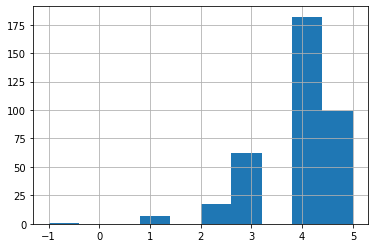

In [75]:
# смотрим на значения
describe_column(stud, 'famrel')

Признак famrel числовой, но на самом деле он категориальный. Есть 27 пустых строк, принимает 5 уникальных значений. Есть ошибка, указано значение "-1". Исправляем ошибку, меняя знак значения, пустые строки заолняем медианой.

In [76]:
stud.loc[stud.famrel == -1.0, 'famrel'] = 1.0

In [77]:
# заполняем пустые строки новым значением
stud.famrel = stud.famrel.fillna(stud.famrel.median())

Признак famrel имеет числовые значения.

Количество пустых строк: 0

Значения признака:
4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

Распределение значений признака:
count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64



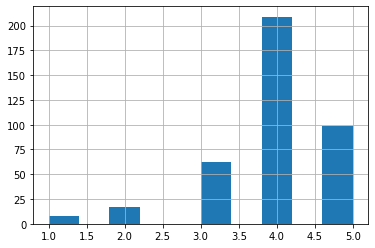

In [78]:
# проверим снова значения
describe_column(stud, 'famrel')

## freetime

Признак freetime имеет числовые значения.

Количество пустых строк: 11

Значения признака:
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Распределение значений признака:
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64



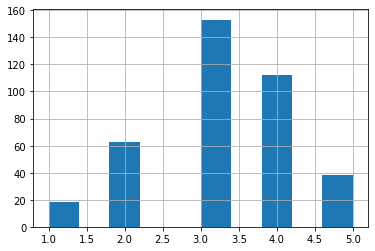

In [79]:
# смотрим на значения
describe_column(stud, 'freetime')

Признак freetime числовой, но на самом деле он категориальный. Есть 11 пустых строк, принимает 5 уникальных значений. Ошибок и выбросов нет, пустые строки заменяем медианой.

In [80]:
# заполняем пустые строки новым значением
stud.freetime = stud.freetime.fillna(stud.freetime.median())

In [81]:
# проверяем пустые строки
stud.freetime.isna().sum()

0

## goout

Признак goout имеет числовые значения.

Количество пустых строк: 8

Значения признака:
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Распределение значений признака:
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64



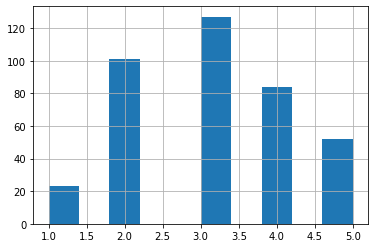

In [82]:
# смотрим на значения
describe_column(stud, 'goout')

Признак goout числовой, но на самом деле он категориальный. Есть 8 пустых строк, принимает 5 уникальных значений. Ошибок и выбросов нет, пустые строки заменяем медианой.

In [83]:
# заполняем пустые строки новым значением
stud.goout = stud.goout.fillna(stud.goout.median())

In [84]:
# проверяем пустые строки
stud.goout.isna().sum()

0

## health

Признак health имеет числовые значения.

Количество пустых строк: 15

Значения признака:
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Распределение значений признака:
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64



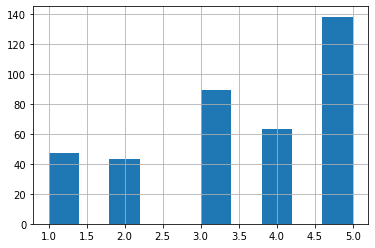

In [85]:
# смотрим на значения
describe_column(stud, 'health')

Признак health числовой, но на самом деле он категориальный. Есть 15 пустых строк, принимает 5 уникальных значений. Ошибок и выбросов нет, пустые строки заменяем медианой.

In [86]:
# заполняем пустые строки новым значением
stud.health = stud.health.fillna(stud.health.median())

In [87]:
# проверяем пустые строки
stud.health.isna().sum()

0

## absences

Признак absences имеет числовые значения.

Количество пустых строк: 12

Значения признака:
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Распределение значений признака:
count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64



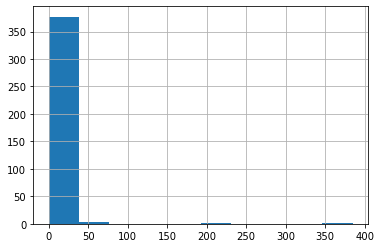

In [88]:
# смотрим на значения
describe_column(stud, 'absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


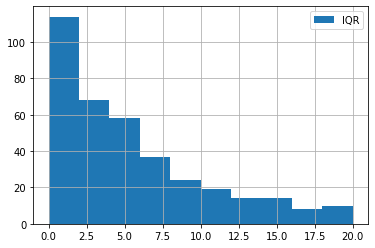

In [89]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


students_absences_plot = stud.absences[stud.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_absences_plot.hist(bins=10, label='IQR')
plt.legend()

In [90]:
# посмотрим на предполагаемые выбросы в колонке absences
# рассмотрим данные больше 0.75-квантиля

students_absentee = stud[stud.absences > perc75]
students_absentee.sort_values('absences')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
346,GP,M,18,R,2,T,4.0,3.0,teacher,services,course,mother,1.0,3.0,0.0,no,no,no,no,yes,yes,yes,yes,5.0,3.0,2.0,4.0,9.0,80.0
317,GP,F,18,U,2,T,4.0,3.0,other,other,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,3.0,4.0,5.0,9.0,45.0
289,GP,M,18,U,1,A,4.0,4.0,teacher,teacher,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,3.0,2.0,9.0,75.0
2,GP,F,15,U,1,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
369,MS,F,18,R,2,T,4.0,4.0,other,teacher,other,father,3.0,2.0,0.0,no,yes,yes,no,no,yes,yes,yes,3.0,2.0,2.0,5.0,10.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,GP,F,16,U,2,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,54.0,55.0
183,GP,F,17,U,1,T,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
276,GP,F,18,R,2,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,yes,no,no,no,no,yes,yes,4.0,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,1,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


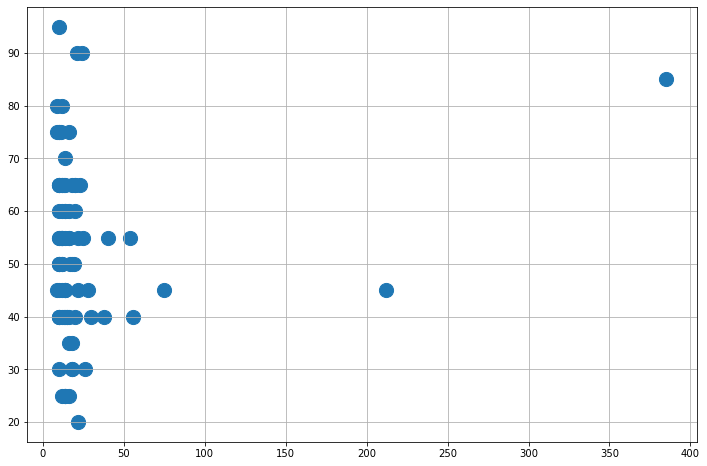

In [91]:
# как распределены оценки в зависимости от прогулов у "прогульщиков"
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(students_absentee.absences, students_absentee.score, s=200)
ax.grid()
plt.show()

Видно, что данные распределены плотно до уровня 40 прогулов. Посмотрим, сколько процентов датасета необходимо удалить, если считать выбросами значения, больше perc75 + 1.5*IQR

In [92]:
students_absentee = stud[stud.absences > perc75 + 1.5*IQR]

print('Учеников с большим количеством прогулов - {:.2%}'
      .format(len(students_absentee.index)/len(stud.index)))

Учеников с большим количеством прогулов - 4.30%


Как видно, если отсекать выбросы, используя расчеты с интерквантильным расстоянием, то выбросим более 4% датасета. Отсечём выбросы значением absences = 40.0, т.к. данные до этого значения расположены достаточно плотно, а также это позволит сохранить максимум информации этого датасета.

In [93]:
students_absentee = stud[stud.absences > 40.0]

print('Учеников с большим количеством прогулов - {:.2%}'
      .format(len(students_absentee.index)/len(stud.index)))

Учеников с большим количеством прогулов - 1.27%


In [94]:
# удаляем выбросы в признаке absences
stud = stud[stud.absences <= 40.0]

In [95]:
# проверяем размеры датасета после преобразования
stud.shape

(378, 29)

Таким образом,удалены выбросы по колонке absence. Теперь заполним пустые строки медианным значением.

In [96]:
stud.absences = stud.absences.fillna(stud.absences.median())

# проверим количество пустых строк
stud.absences.isna().sum()

0

## score

In [97]:
# проверям пустые значения
stud.score.isna().sum()

5

In [98]:
# сохраним строки с пустым score, возможно они понадобятся на валидации
# в основном датасете удаляем эти строки
students_empty_score = stud[stud.score.isna()]

stud = stud[stud.score.isna() == False]

In [99]:
# проверям пустые значения после удаления
stud.score.isna().sum()

0

In [100]:
# проверяем размеры после удаления
stud.shape

(373, 29)

In [101]:
# проверяем значения после преобразования
stud.score.describe()

count    373.000000
mean      52.010724
std       22.877182
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

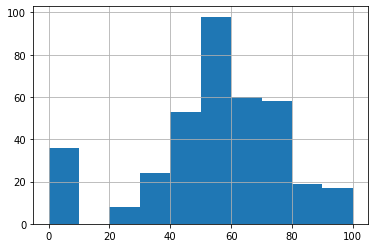

In [102]:
stud.score.hist()

Распределение похоже на нормальное, картину сиильно портит большое количество нулевых значений. Нужно понять, оставлять их или нет.

In [103]:
# сколько нулевых значений
print('Учеников с нулевой оценкой - {:.2%}'
      .format(len(stud[stud.score == 0].index)/len(stud.index)))

Учеников с нулевой оценкой - 9.65%


25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


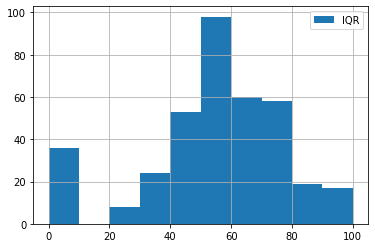

In [104]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


students_score_plot = stud.score[stud.score.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_score_plot.hist(bins=10, label='IQR')
plt.legend()

Получаем, что ученики с нулевой оценкой значимы для нас, их выбрасывать нельзя. Границы выбросов выходят за 100-бальную оценку.

## Корреляционный анализ количественных переменных

Выясним, какие столбцы коррелируют с оценкой score. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

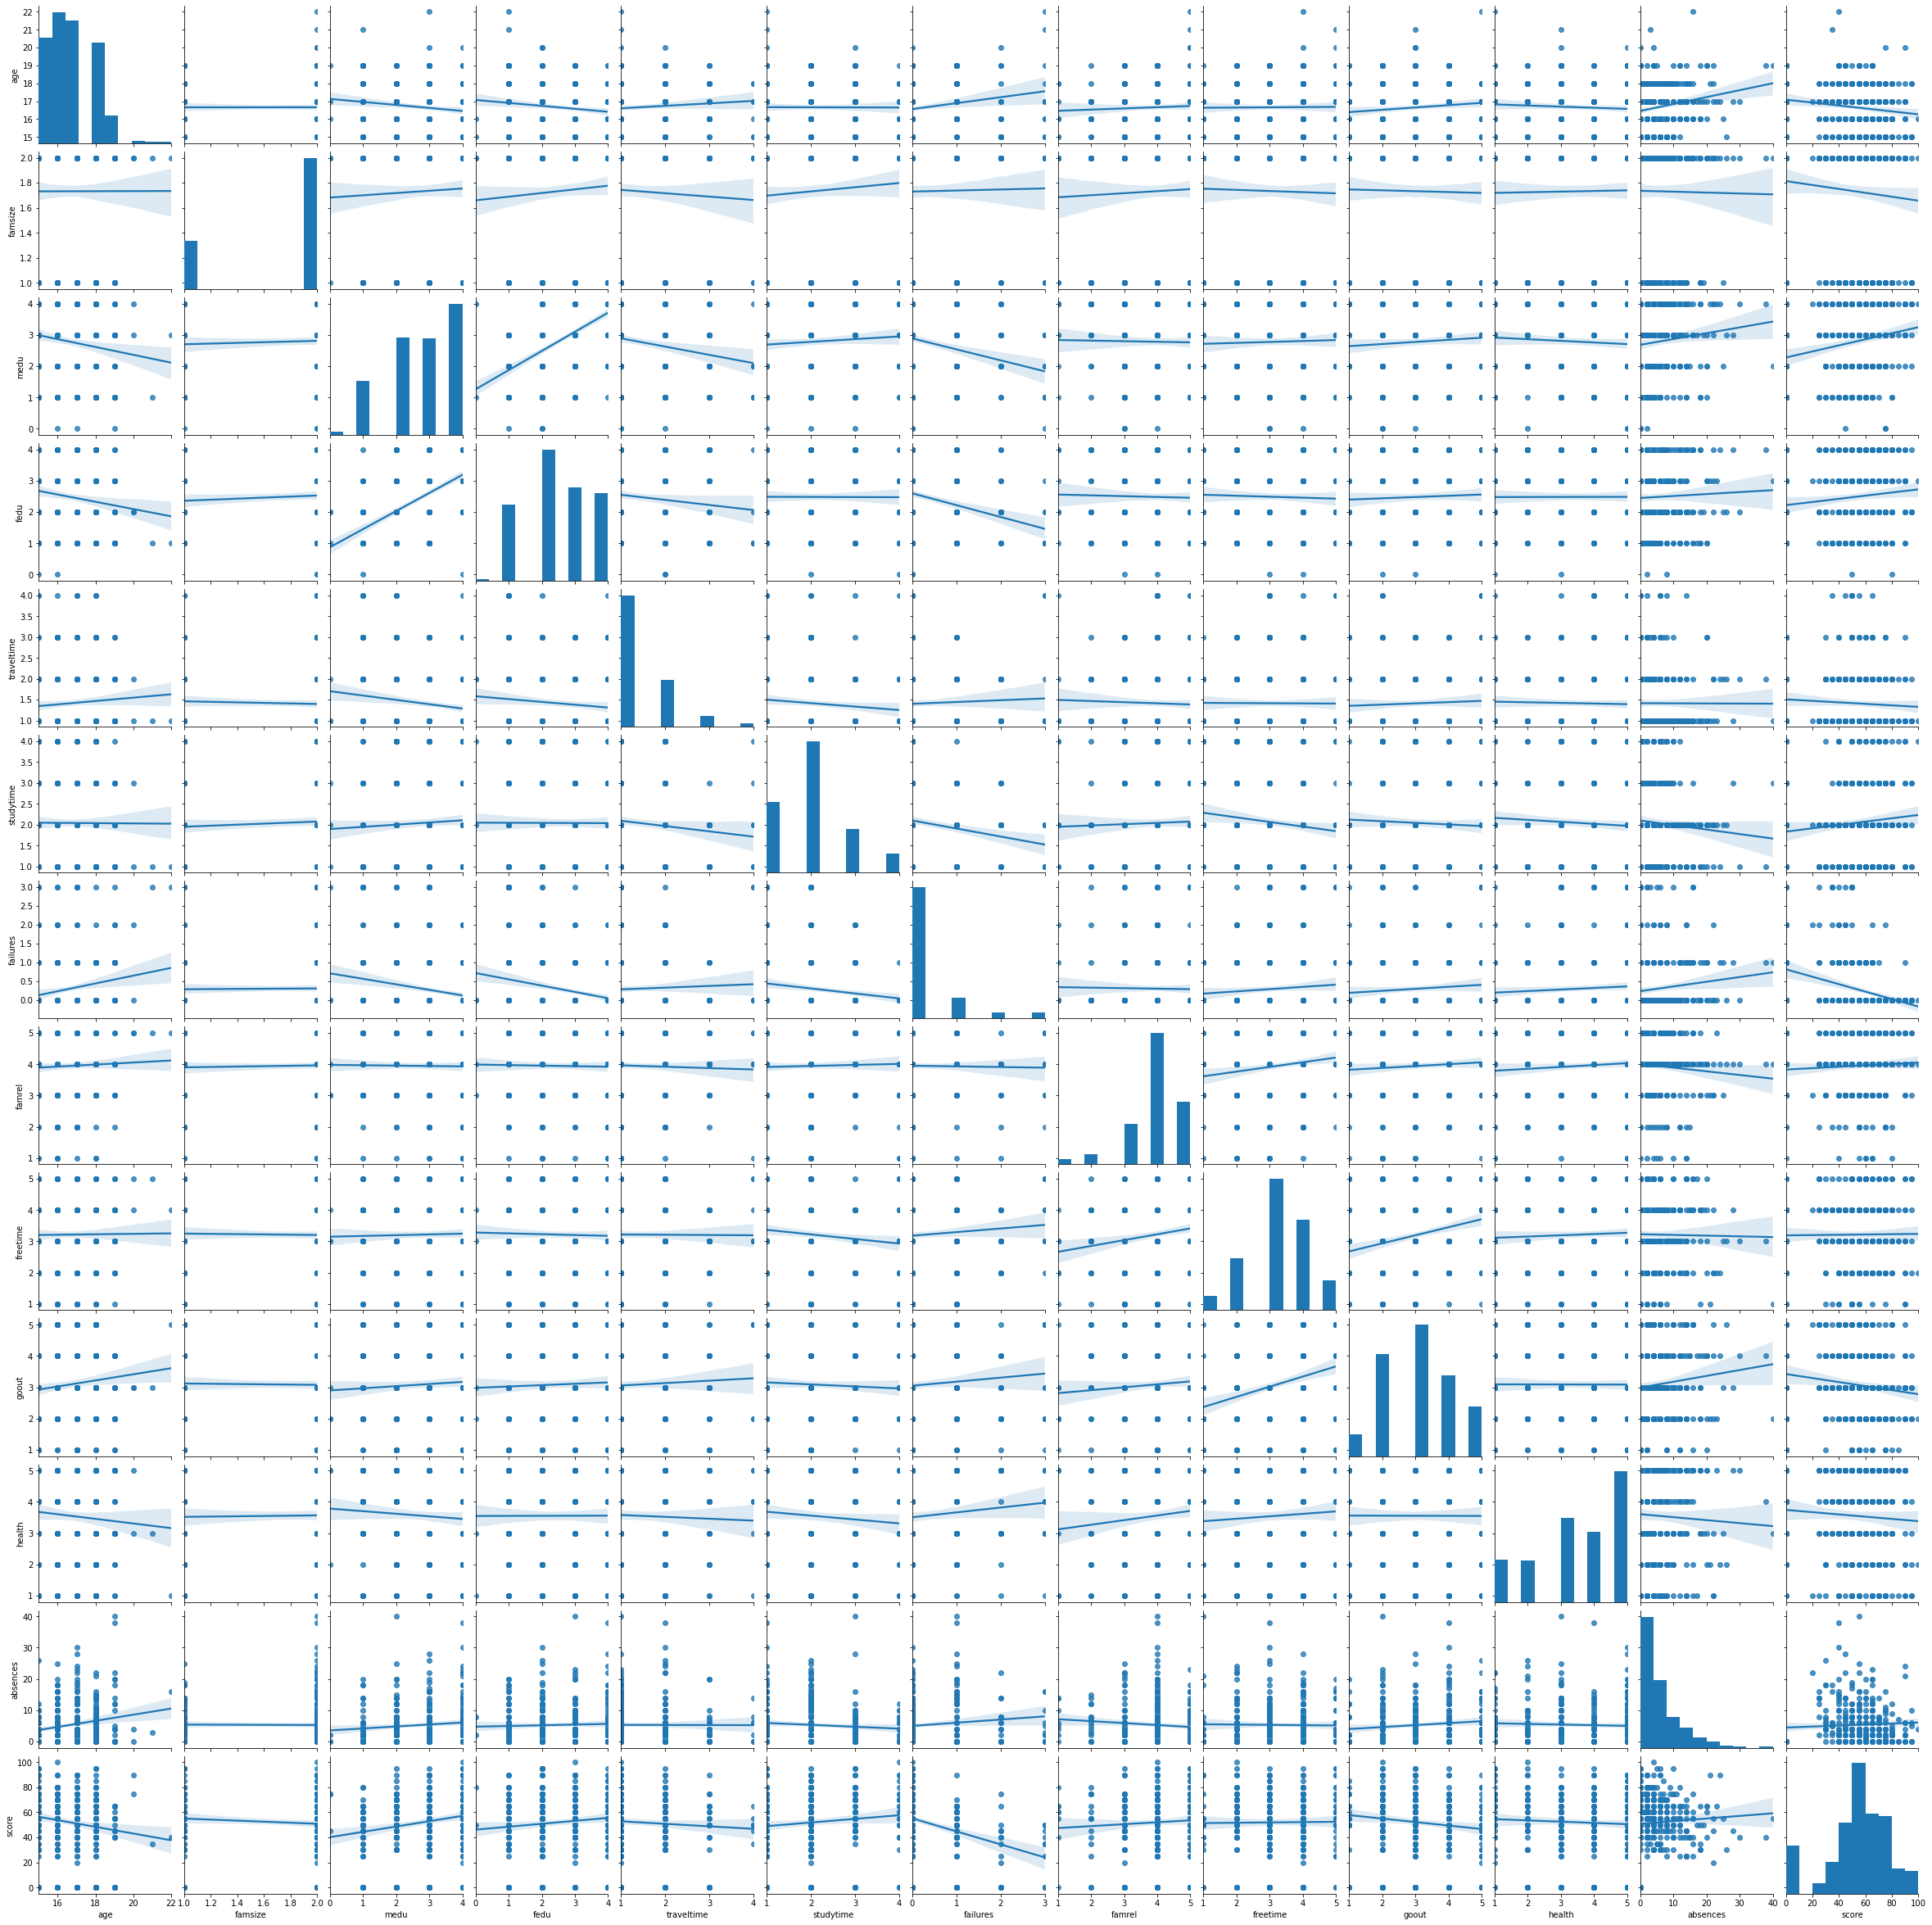

In [105]:
sns.pairplot(stud, kind='reg')

Используем для наглядности матрицу корреляций:

In [106]:
stud.corr()

,age,famsize,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,0.001053,-0.145286,-0.138511,0.074539,-0.004835,0.185247,0.046721,0.009455,0.112323,-0.068361,0.194972,-0.148292
famsize,0.001053,1.000000,0.044469,0.069983,-0.041715,0.064367,0.013426,0.032118,-0.020306,-0.017371,0.015466,-0.010302,-0.080514
medu,-0.145286,0.044469,1.000000,0.594773,-0.165824,0.067491,-0.226491,-0.015174,0.027130,0.067681,-0.065549,0.108305,0.203274
fedu,-0.138511,0.069983,0.594773,1.000000,-0.104728,-0.003693,-0.251323,-0.021264,-0.028649,0.041616,0.002047,0.037407,0.108826
traveltime,0.074539,-0.041715,-0.165824,-0.104728,1.000000,-0.102573,0.044144,-0.034732,-0.005777,0.047738,-0.029987,-0.002801,-0.060002
studytime,-0.004835,0.064367,0.067491,-0.003693,-0.102573,1.000000,-0.159625,0.031837,-0.126750,-0.049853,-0.076985,-0.080893,0.107880
failures,0.185247,0.013426,-0.226491,-0.251323,0.044144,-0.159625,1.000000,-0.016925,0.082581,0.082840,0.079922,0.112645,-0.320487
famrel,0.046721,0.032118,-0.015174,-0.021264,-0.034732,0.031837,-0.016925,1.000000,0.167158,0.074753,0.094393,-0.085619,0.059105
freetime,0.009455,-0.020306,0.027130,-0.028649,-0.005777,-0.126750,0.082581,0.167158,1.000000,0.288806,0.056151,-0.014663,0.011045
goout,0.112323,-0.017371,0.067681,0.041616,0.047738,-0.049853,0.082840,0.074753,0.288806,1.000000,-0.002344,0.108336,-0.133678


(13.5, -0.5)

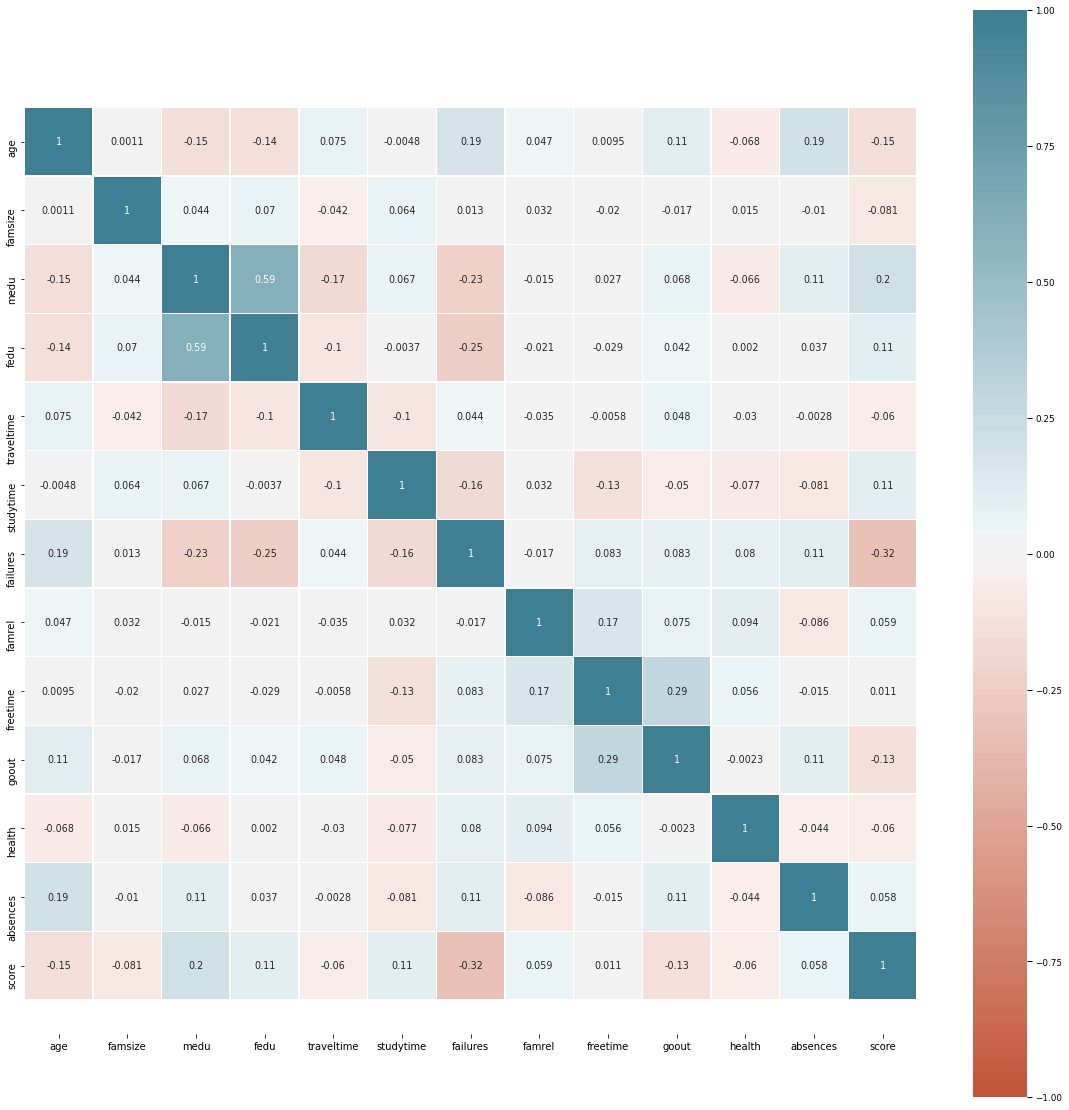

In [107]:
fig, ax = plt.subplots(figsize=(20, 20))

sns.set_context('paper')
sns.heatmap(
    stud.corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    linewidths=.5,
    square=True)

# исправление отображения heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Предварительные выводы по корреляционному анализу

1. Признак failures (количество внеучебных неудач) имеет хорошую корреляцию с образованием родителей (medu, fedu), а также еще более сильную корреляцию с результатами по математике score.
2. Также хорошую скоррелированность с результатами score показывают возраст(age), время на учёбу помимо школы(studytime) и проведенное времени с друзьями(goout).
3. Признаки - кандидаты на удаление: famsize, traveltime, famrel, freetime, health, absences.

## Проведем дополнительный анализ значимости для колонок со слабой корреляцией.

### famsize

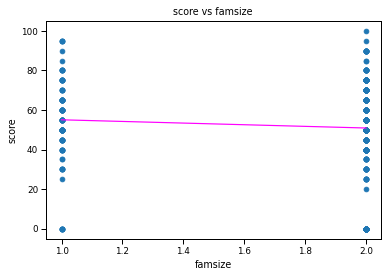

r - коэффициент корреляции между famsize and score: -0.0805136003471414

Уровень значимости нулевой гипотезы о независимости признаков: 0.12059577237776914


In [108]:
# определими значимость famsize
get_Scatter_Plot(stud, 'famsize', 'score')

In [109]:
get_stat_dif(stud, 'famsize', 'score')

Статистические различия для признаков famsize и score не найдены 


Таким образом кажется, что признак famsize незначим для результатов score. Но не торопимся удалаять!

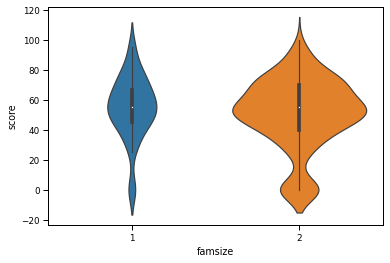

In [110]:
# посмотрим на распределение значений в графике violinplot
sns.violinplot(x='famsize', y='score', data=stud, scale='count')
plt.show()

Возникает идея посмотреть на данные в колонках не как на числовые значения, а на категориальные. Для этого сделаем dummy variables и посмотрим их распределение и значимость

In [111]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить stud
dummies = pd.get_dummies(stud['famsize']).rename(
    columns=lambda x: 'famsize_' + str(x))

dummies['score'] = stud['score']

In [112]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['famsize_1', 'famsize_2'], dtype='object')

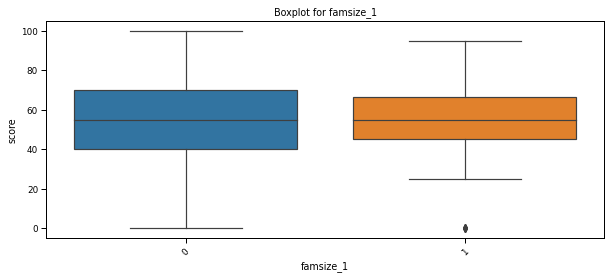

Статистические различия для признаков famsize_1 и score не найдены 


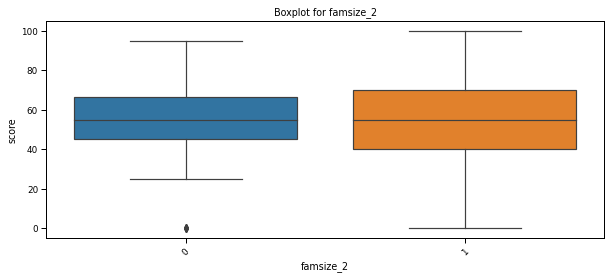

Статистические различия для признаков famsize_2 и score не найдены 


In [113]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

Вывод: колонку famsize удаляем.

### traveltime

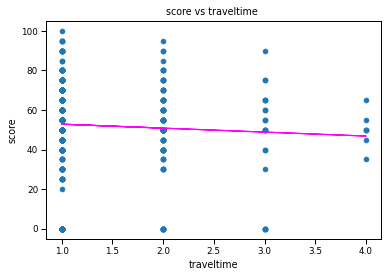

r - коэффициент корреляции между traveltime and score: -0.06000195770394525

Уровень значимости нулевой гипотезы о независимости признаков: 0.24768828123858747


In [114]:
# смотрим значимость traveltime
get_Scatter_Plot(stud, 'traveltime', 'score')

In [115]:
get_stat_dif(stud, 'traveltime', 'score')

Статистические различия для признаков traveltime и score не найдены 


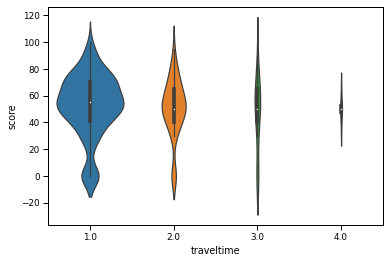

In [116]:
# посмотрим на распределение значений в графике violinplot
sns.violinplot(x='traveltime', y='score', data=stud, scale='count')
plt.show()

In [117]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить stud
dummies = pd.get_dummies(stud['traveltime']).rename(
    columns=lambda x: 'traveltime_' + str(x))

dummies['score'] = stud['score']

In [118]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['traveltime_1.0', 'traveltime_2.0', 'traveltime_3.0', 'traveltime_4.0'], dtype='object')

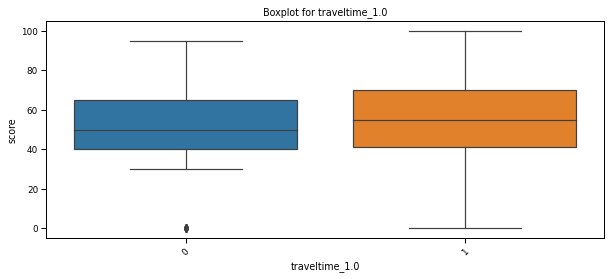

Статистические различия для признаков traveltime_1.0 и score не найдены 


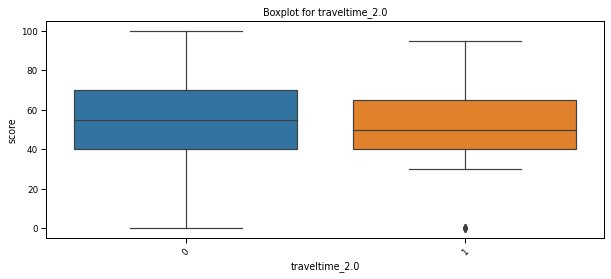

Статистические различия для признаков traveltime_2.0 и score не найдены 


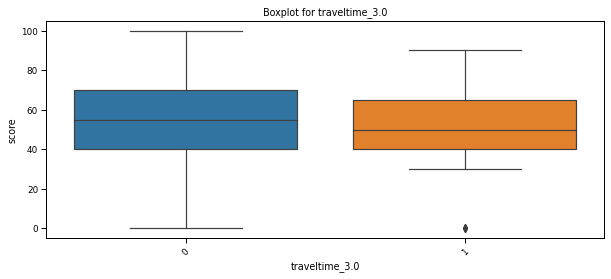

Статистические различия для признаков traveltime_3.0 и score не найдены 


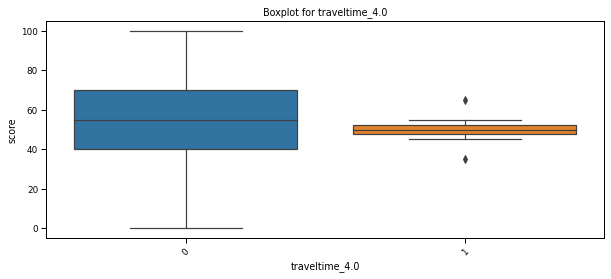

Статистические различия для признаков traveltime_4.0 и score не найдены 


In [119]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

Вывод: колонку famsize удаляем.

## famrel

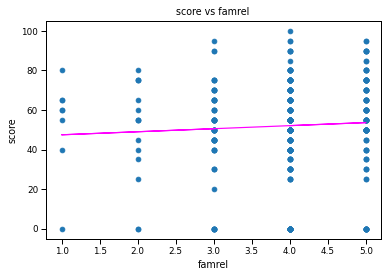

r - коэффициент корреляции между famrel and score: 0.05910483985815208

Уровень значимости нулевой гипотезы о независимости признаков: 0.2548414784662433


In [120]:
# смотрим значимость famrel
get_Scatter_Plot(stud, 'famrel', 'score')

In [121]:
get_stat_dif(stud, 'famrel', 'score')

Статистические различия для признаков famrel и score не найдены 


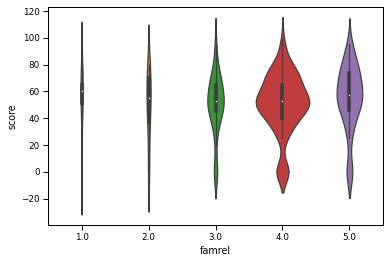

In [122]:
# посмотрим на распределение значений в графике violinplot
sns.violinplot(x='famrel', y='score', data=stud, scale='count')
plt.show()

In [123]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить stud
dummies = pd.get_dummies(stud['famrel']).rename(
    columns=lambda x: 'famrel_' + str(x))

dummies['score'] = stud['score']

In [124]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['famrel_1.0', 'famrel_2.0', 'famrel_3.0', 'famrel_4.0', 'famrel_5.0'], dtype='object')

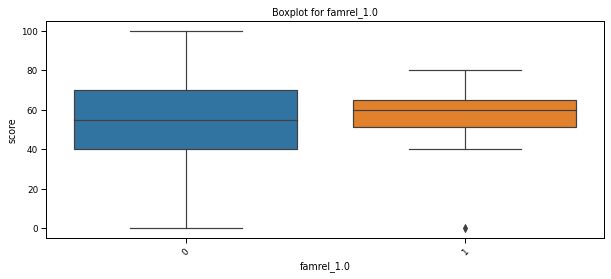

Статистические различия для признаков famrel_1.0 и score не найдены 


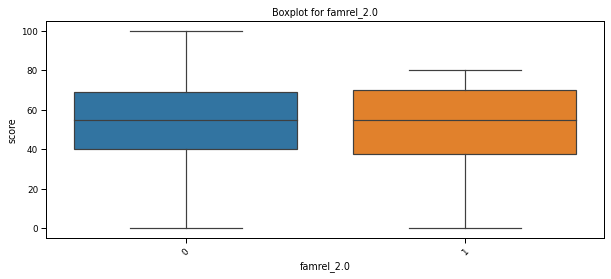

Статистические различия для признаков famrel_2.0 и score не найдены 


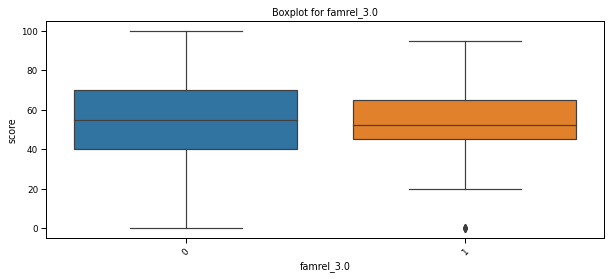

Статистические различия для признаков famrel_3.0 и score не найдены 


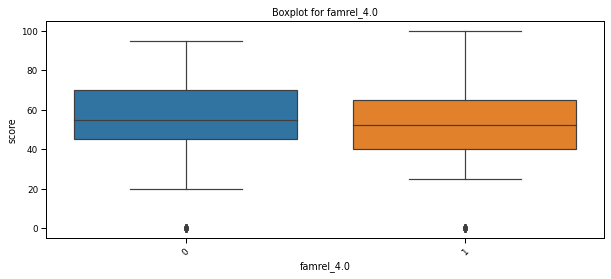

Статистические различия для признаков famrel_4.0 и score не найдены 


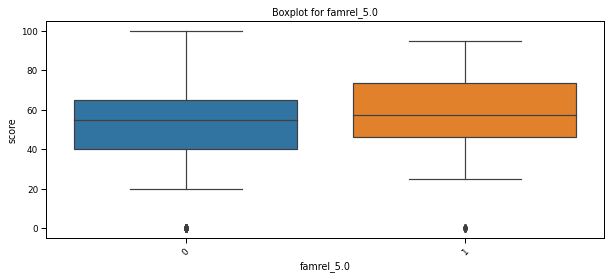

Статистические различия для признаков famrel_5.0 и score не найдены 


In [125]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

Вывод: колонку famrel удаляем.

## freetime

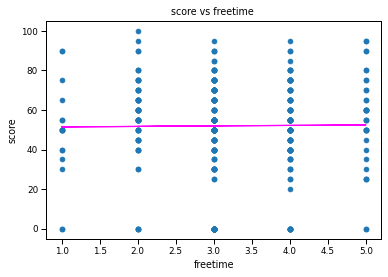

r - коэффициент корреляции между freetime and score: 0.011044601412152842

Уровень значимости нулевой гипотезы о независимости признаков: 0.8316411332217777


In [126]:
# смотрим значимость freetime
get_Scatter_Plot(stud, 'freetime', 'score')

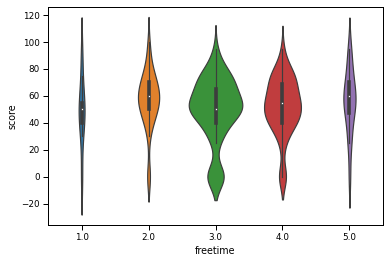

In [127]:
sns.violinplot(x='freetime', y='score', data=stud, scale='count')
plt.show()

In [128]:
get_stat_dif(stud, 'freetime', 'score')

Статистические различия для признаков freetime и score не найдены 


In [129]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить stud
dummies = pd.get_dummies(stud['freetime']).rename(
    columns=lambda x: 'freetime_' + str(x))

dummies['score'] = stud['score']

In [130]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['freetime_1.0', 'freetime_2.0', 'freetime_3.0', 'freetime_4.0',
       'freetime_5.0'],
      dtype='object')

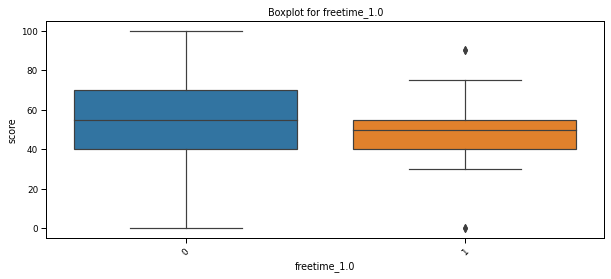

Статистические различия для признаков freetime_1.0 и score не найдены 


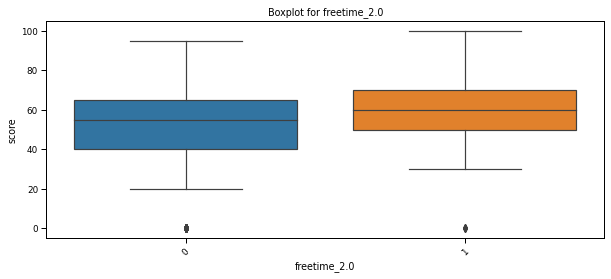

Статистические различия для признаков freetime_2.0 и score не найдены 


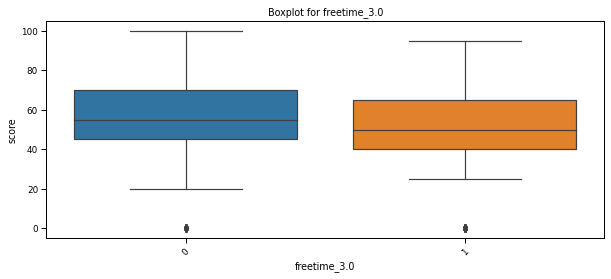

Статистические различия для признаков freetime_3.0 и score не найдены 


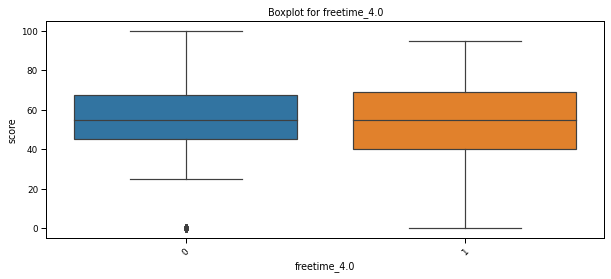

Статистические различия для признаков freetime_4.0 и score не найдены 


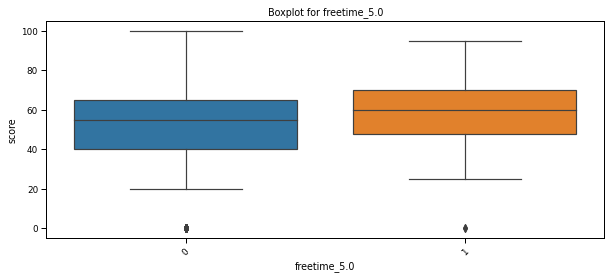

Статистические различия для признаков freetime_5.0 и score не найдены 


In [131]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

Вывод: колонку freetime удаляем.

### health

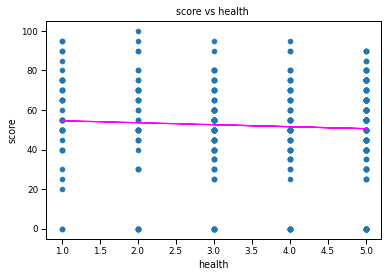

r - коэффициент корреляции между health and score: -0.06014702005229705

Уровень значимости нулевой гипотезы о независимости признаков: 0.24654490022170786


In [132]:
# смотрим значимость health
get_Scatter_Plot(stud, 'health', 'score')

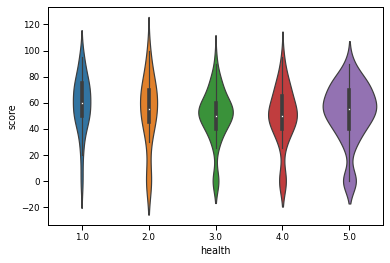

In [133]:
sns.violinplot(x='health', y='score', data=stud, scale='count')
plt.show()

In [134]:
get_stat_dif(stud, 'health', 'score')

Статистические различия для признаков health и score не найдены 


In [135]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить stud
dummies = pd.get_dummies(stud['health']).rename(
    columns=lambda x: 'health_' + str(x))

dummies['score'] = stud['score']

In [136]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['health_1.0', 'health_2.0', 'health_3.0', 'health_4.0', 'health_5.0'], dtype='object')

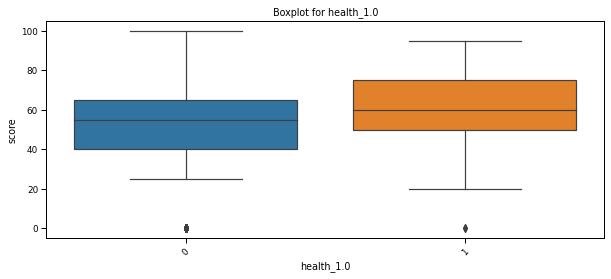

Внимание! Найдены статистически значимые различия для признаков health_1.0 и score


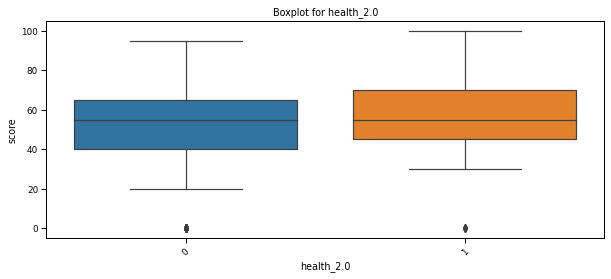

Статистические различия для признаков health_2.0 и score не найдены 


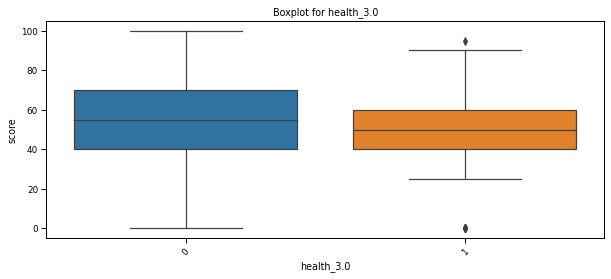

Статистические различия для признаков health_3.0 и score не найдены 


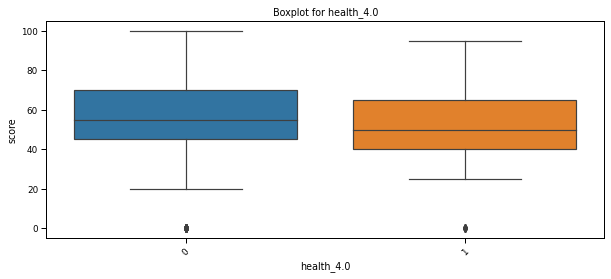

Статистические различия для признаков health_4.0 и score не найдены 


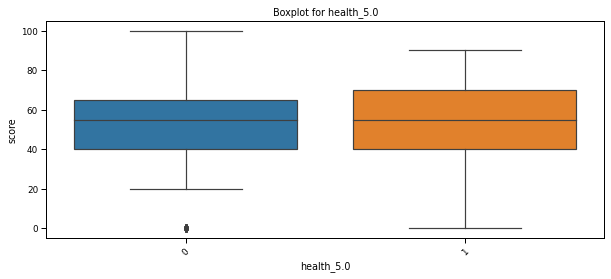

Статистические различия для признаков health_5.0 и score не найдены 


In [137]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

Вывод: колонку health не удаляем!

## absences

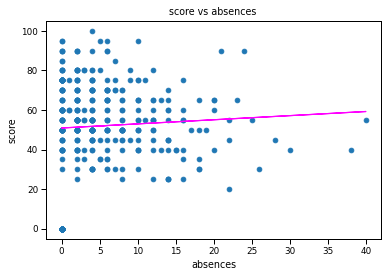

r - коэффициент корреляции между absences and score: 0.05808137146913343

Уровень значимости нулевой гипотезы о независимости признаков: 0.2631753738848733


In [138]:
# смотрим значимость absences
get_Scatter_Plot(stud, 'absences', 'score')

In [139]:
get_stat_dif(stud, 'absences', 'score')

Внимание! Найдены статистически значимые различия для признаков absences и score


Вывод: колонку absences не удаляем!

## Вывод по корреляционному анализу

Только признак health при создании dummy переменных показал значимость части своих значений. Поэтому следующие признаки для удаления - famsize, traveltime, famrel, freetime из-за слабой корреляции с целевым признаком score; studytime_granular из-за линейной зависимости от признака studytime.

На основе health создадим dummy переменные в датасет students.

In [140]:
dummies = pd.get_dummies(stud['health']).rename(
    columns=lambda x: 'health_' + str(x))
stud = pd.concat([stud, dummies], axis=1)

## Анализ номинативных переменных

In [141]:
columns_for_print = ['school', 'sex', 'address', 'pstatus', 'mjob', 'fjob',
                     'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                     'activities', 'nursery', 'higher', 'internet', 'romantic']

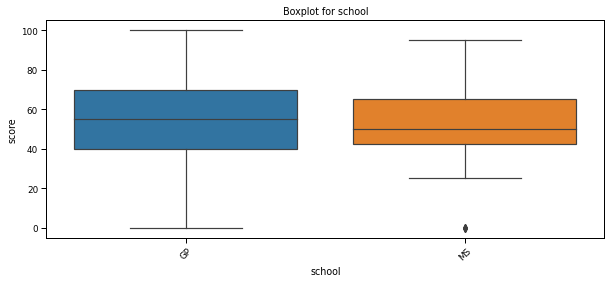

Статистические различия для признаков school и score не найдены 


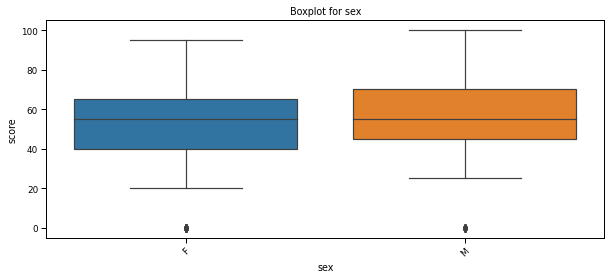

Внимание! Найдены статистически значимые различия для признаков sex и score


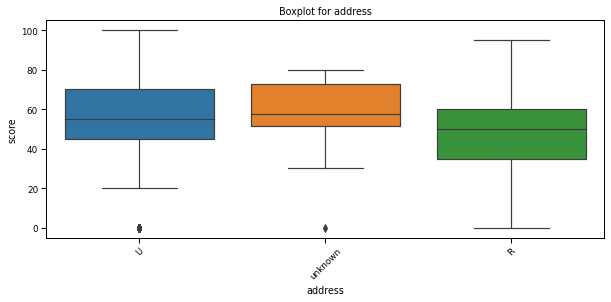

Внимание! Найдены статистически значимые различия для признаков address и score


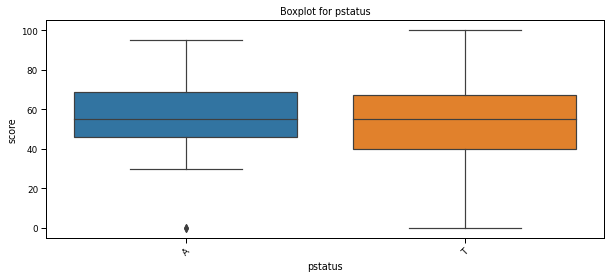

Статистические различия для признаков pstatus и score не найдены 


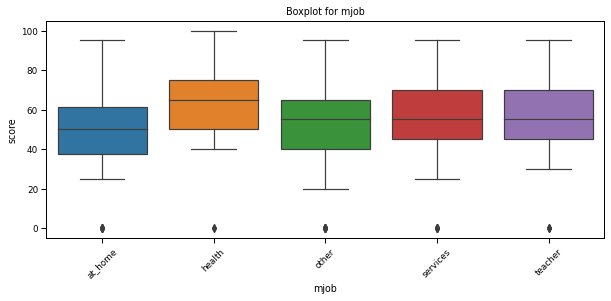

Внимание! Найдены статистически значимые различия для признаков mjob и score


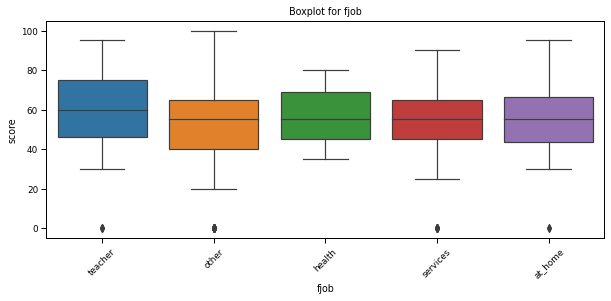

Статистические различия для признаков fjob и score не найдены 


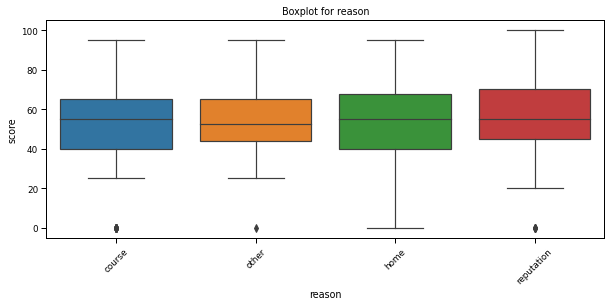

Статистические различия для признаков reason и score не найдены 


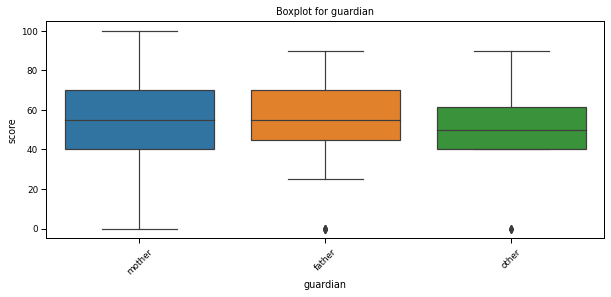

Статистические различия для признаков guardian и score не найдены 


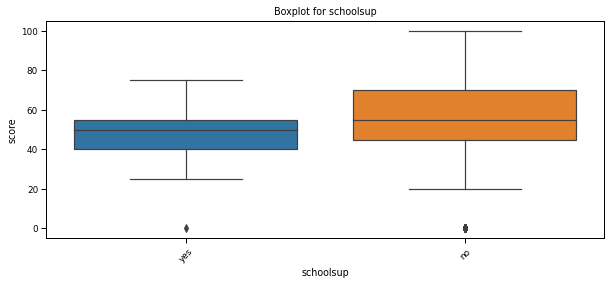

Статистические различия для признаков schoolsup и score не найдены 


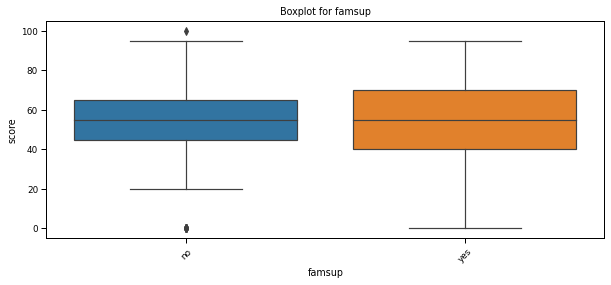

Статистические различия для признаков famsup и score не найдены 


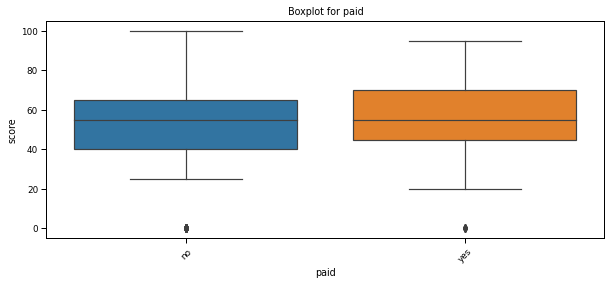

Статистические различия для признаков paid и score не найдены 


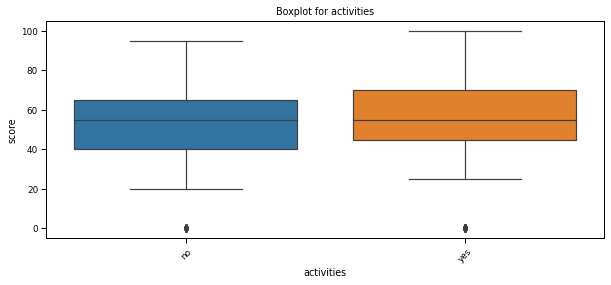

Статистические различия для признаков activities и score не найдены 


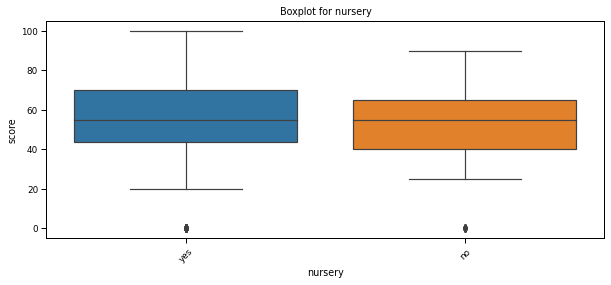

Статистические различия для признаков nursery и score не найдены 


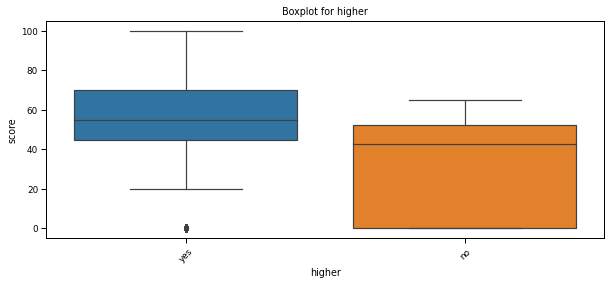

Внимание! Найдены статистически значимые различия для признаков higher и score


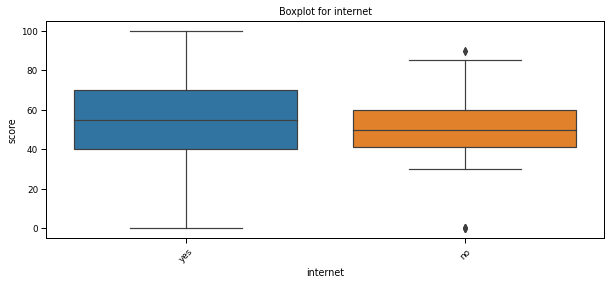

Статистические различия для признаков internet и score не найдены 


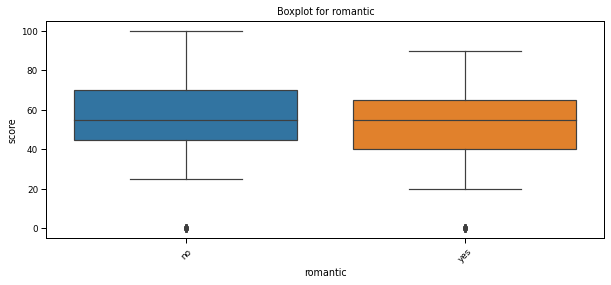

Внимание! Найдены статистически значимые различия для признаков romantic и score


In [142]:
for column in columns_for_print:
    get_boxplot(stud, column, 'score')
    get_stat_dif(stud, column, 'score')

## Вывод по номинативным переменным

Судя по графикам распределений и результатам теста Тьюринга, следующие признаки можно исключить как незначимые для анализа зависимости результатов по математике: school, pstatus, mjob, fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, internet, romantic

## Удаление колонок

In [143]:
# удаляем количественные переменные
stud = stud.drop(['famsize', 'traveltime', 'famrel', 'freetime',
                  'absences', 'health'], axis=1)

# удаляем номинативные переменные
stud = stud.drop(['school', 'pstatus', 'mjob', 'fjob', 'reason',
                  'guardian', 'schoolsup', 'famsup', 'paid',
                  'activities', 'nursery', 'internet', 'romantic'], axis=1)

In [144]:
# смотри итоговую информацию по обработанному датасету
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         373 non-null    object 
 1   age         373 non-null    int64  
 2   address     373 non-null    object 
 3   medu        373 non-null    float64
 4   fedu        373 non-null    float64
 5   studytime   373 non-null    float64
 6   failures    373 non-null    float64
 7   higher      373 non-null    object 
 8   goout       373 non-null    float64
 9   score       373 non-null    float64
 10  health_1.0  373 non-null    uint8  
 11  health_2.0  373 non-null    uint8  
 12  health_3.0  373 non-null    uint8  
 13  health_4.0  373 non-null    uint8  
 14  health_5.0  373 non-null    uint8  
dtypes: float64(6), int64(1), object(3), uint8(5)
memory usage: 43.9+ KB


In [145]:
stud.columns

Index(['sex', 'age', 'address', 'medu', 'fedu', 'studytime', 'failures',
       'higher', 'goout', 'score', 'health_1.0', 'health_2.0', 'health_3.0',
       'health_4.0', 'health_5.0'],
      dtype='object')

In [146]:
stud.shape

(373, 15)

## Итоговый вывод:

1. Признак studytime_granular линейно зависим от признака studytime, коэффициент корреляции равен -1. Поэтому признак studytime_granular удаляем.
2. Признак failures (количество внеучебных неудач) имеет хорошую корреляцию с образованием родителей (Medu, Fedu), а также еще более сильную корреляцию с результатами по математике score.
3. Также хорошую скоррелированность с результатами score показывают возраст(age), время на учёбу помимо школы(studytime) и проведенное времени с друзьями(goout).
4. Признак health при создании dummy переменных показал значимость части своих значений. На основе health созданы dummy переменные в датасет students.
5. Количественные признаки для удаления - famsize, traveltime, famrel, freetime, absences из-за слабой корреляции с целевым признаком score.
6. Номинативные признаки для удаления как незначимые по результатам теста Тьюринга: school, pstatus, mjob, fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, internet, romantic.
В датасете осталось 373 строки, 15 признаков. Пустые строки отсутствуют. Ошибки и выбросы обработаны.

Признаки, которые остались после обработок:

sex,
age,
address,
Medu,
Fedu,
studytime,
failures,
higher,
goout,
score,
health_1.0,
health_2.0,
health_3.0,
health_4.0,
health_5.0.